# COSC74/174 Decision Tree


# Decision Tree  

Various versions of decision tree algorithm are widely used for both **regression** (yes, regression!) and **classification**. Today we are gonna introduce the basic concept of decision tree, random forest(ensemble method), and boost decision tree(boosting method). 

The Decision Tree(DT) is a non-paramatric supervised machine learning method. The [scikit-learn documentation](https://scikit-learn.org/stable/modules/tree.html) on DT provides a clear explanation. Why the general tree method is not only because its powerful ability to make prediction, but also the **interpretability**, which means how can we drive insights from the most important factors, in DT's case are the slitting node. At the same time, we do not really need much data preprocessing and feature engineering as the algorithm would pick the best *splitting point*.

So the first question is how does decision tree pick the *best splitting point*? The most basic thought is to compute the homogeneity after the splitting, say if we have a feature that can seperate all positive results into one group and the negative results into another group, that's the perfect scenario. But in reality that does not happen a lot. The ID3 algorithm, use the concept of [entropy and information gain](https://towardsdatascience.com/entropy-how-decision-trees-make-decisions-2946b9c18c8) to gauge the homegeneity of the splitting results and select the best feature and the value to split the tree. [This article](https://sefiks.com/2017/11/20/a-step-by-step-id3-decision-tree-example/) provides a step-by-step example to clearly explain how the algorithm works.


Now, let's try the model on the dataset on which naive bayes cannot really perform well. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix

/anaconda3/lib/python3.6/site-packages/scipy/__init__.py:115: UserWarning: Numpy 1.13.3 or above is required for this version of scipy (detected version 1.11.3)
  UserWarning)


In [2]:
#read the training data into DataFrame and inspect the dataset 
trainingfile = 'NBtrainingset.csv'
train_data = pd.read_csv(trainingfile)
print('The number of rows in the training dataset is %d.'%(len(train_data)))
train_data.head()

The number of rows in the training dataset is 5600.


,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Label
0,7430.14,9529.78,-2453.33,19,123,621,0
1,11256.40,50455.10,-4220.00,18,216,2677,0
2,13093.00,51897.10,-2880.00,30,234,2464,0
3,14303.00,102632.00,-5702.20,144,281,4061,1
4,14688.00,83343.40,-2430.00,52,223,2822,1


In [3]:
# separate the features and labels 
X = train_data.drop(labels = ['Label'],axis=1)
y = train_data['Label']

In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
clf = DecisionTreeClassifier(random_state=0)
clf = clf.fit(X, y)

Once the tree is trained, we can look at how the tree is built by the algorithm.

[Text(152.974582475, 213.258461538, 'X[2] <= -4862.0\ngini = 0.488\nsamples = 5600\nvalue = [3230, 2370]'),
 Text(71.0394101184, 204.895384615, 'X[5] <= 2060.5\ngini = 0.479\nsamples = 1771\nvalue = [702, 1069]'),
 Text(70.5301117727, 196.532307692, 'gini = 0.0\nsamples = 109\nvalue = [0, 109]'),
 Text(71.5487084641, 196.532307692, 'X[3] <= 195.5\ngini = 0.488\nsamples = 1662\nvalue = [702, 960]'),
 Text(67.5939371791, 188.169230769, 'X[4] <= 540.5\ngini = 0.494\nsamples = 1571\nvalue = [701, 870]'),
 Text(67.0846388334, 179.806153846, 'X[4] <= 536.0\ngini = 0.498\nsamples = 1508\nvalue = [701, 807]'),
 Text(60.7029913006, 171.443076923, 'X[5] <= 14034.0\ngini = 0.49\nsamples = 1405\nvalue = [602, 803]'),
 Text(49.9768896178, 163.08, 'X[1] <= 201754.5\ngini = 0.479\nsamples = 1293\nvalue = [513, 780]'),
 Text(34.6362664005, 154.716923077, 'X[5] <= 5536.5\ngini = 0.497\nsamples = 1098\nvalue = [504, 594]'),
 Text(14.6502852253, 146.353846154, 'X[2] <= -6818.5\ngini = 0.467\nsamples = 77

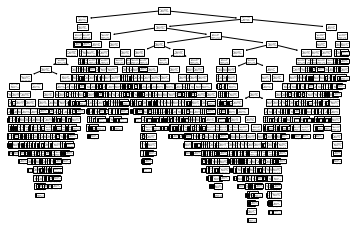

In [6]:
plot_tree(clf)

The actual visualization result is not very ideal but since the features do not have actual meaning. But the plot would be a great way to see which features are the most important ones in the real-world application. Let's first check out the accuracy of the simpliest DT on our synthesized dataset.

In [8]:
score = np.average(cross_val_score(clf, X, y,scoring= 'f1', cv = 10))
print('The average f1 score with 10-fold crossvalidation is {:0.4}'.format(score))

The average f1 score with 10-fold crossvalidation is 0.7954


Boom! The accuracy is far better than what we have achieved with Naive Bayes, along with complex feature selection. 
Note: Decision Tree tends to overfit with too many features (too specific split), so we may need to conduct PCA or some dimension reduction technique. In our case, we only have 6 features so it is fine. Next, we would try the ensemble method - Random Forest. To solve the problem of overfitting, we randomly train a bunch of weak learners and we use the *wisdom of the mass* to find out the best solution.

# Random Forest

In [24]:
from sklearn.ensemble import RandomForestClassifier
clf_rf = RandomForestClassifier()
clf_rf.fit(X,y)

/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [25]:
print(clf_rf.feature_importances_)

[ 0.12172943  0.18597327  0.21375826  0.14798524  0.15790793  0.17264588]


We can see different importance of weights in our random forest model

In [26]:
score_rf = np.average(cross_val_score(clf_rf, X, y,scoring= 'f1', cv = 10))
print('The average f1 score with 10-fold crossvalidation is {:0.4}'.format(score_rf))

The average f1 score with 10-fold crossvalidation is 0.8494


Apparently, the random forest performs better than the simplist decision trees, compared to the f1-score of 79.54%

## The Hyperparameter of Random Forest

There are mainly two hyperparameters regarding the randome forest classifier. One is ```n_estimators```,the number of trees. The other is ```max_depth=None```, which is how specific the tree would split the dataset. The default vaue of number of trees is 100. The larger the forest, the more accuracy is the classifier but the longer the algorithm would run. The max depth would decide whether the classifier is overfitting. 

In [36]:
scores_rf2 = []
for depth in range(1,100):
    clf_rf2 = RandomForestClassifier(n_estimators=100, max_depth=depth)
    score_rf2 = np.average(cross_val_score(clf_rf2, X, y,scoring= 'f1', cv = 10))
    scores_rf2.append(score_rf2)


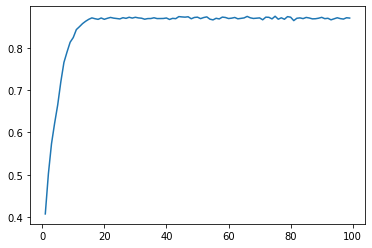

In [37]:
x = range(1,100)
plt.plot(x,scores_rf2)

As we can see from the plot, the accuracy keeps increasing as we increase the depth of the tree (the complexity of the tree). We at least need the depth of 20 to have a decent result.

# XGBoost Tree and Boosting Methond

In [ ]:
import xgboost as xgb

XGBoost stands for *“Extreme Gradient Boosting”*, which used decision tree ensembles

The general principle is we want both a simple and predictive model. The tradeoff between the two is also referred as **bias-variance** tradeoff in machine learning. 